In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_columns = ["Polarity", "Id", "Date & Time", "Query", "Username", "Tweet"]
data = pd.read_csv("tweet_sentiment_data.csv", names=data_columns)
data.head()

,Polarity,Id,Date & Time,Query,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Polarity     1600000 non-null  int64 
 1   Id           1600000 non-null  int64 
 2   Date & Time  1600000 non-null  object
 3   Query        1600000 non-null  object
 4   Username     1600000 non-null  object
 5   Tweet        1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
data.isnull().sum()

Polarity       0
Id             0
Date & Time    0
Query          0
Username       0
Tweet          0
dtype: int64

In [5]:
import re
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


In [6]:
data["Tweet"] = data["Tweet"].apply(clean)
data["Tweet"].head()

0    switchfoot   awww that bummer  shoulda got dav...
1    upset cant updat facebook text might cri resul...
2    kenichan dive mani time ball manag save   rest...
3                     whole bodi feel itchi like fire 
4               nationwideclass behav im mad cant see 
Name: Tweet, dtype: object

## All Sentiments

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

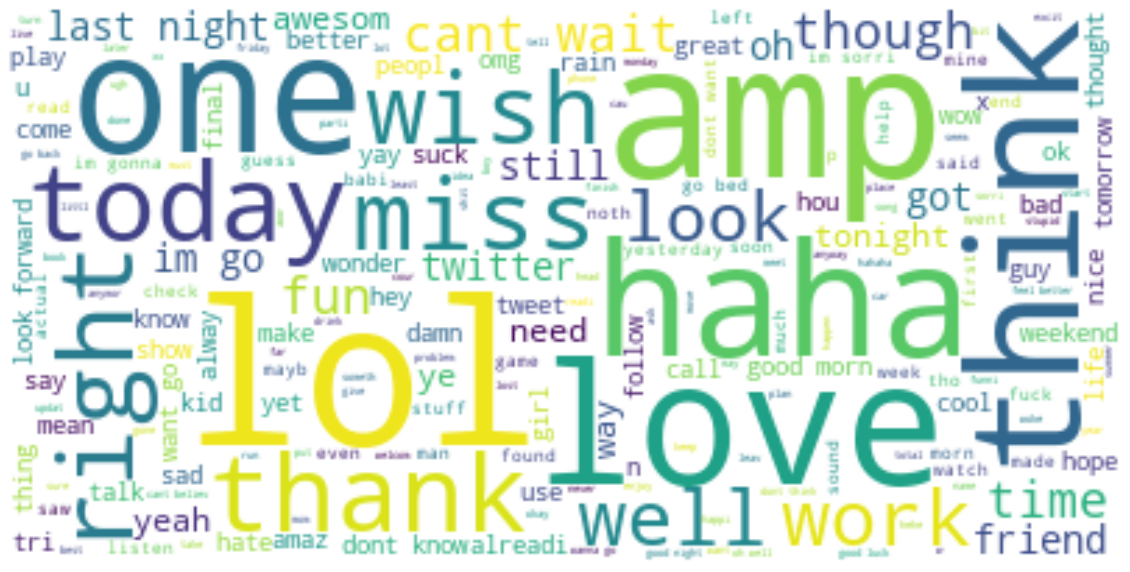

In [8]:
plt.figure( figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Positive Sentiments

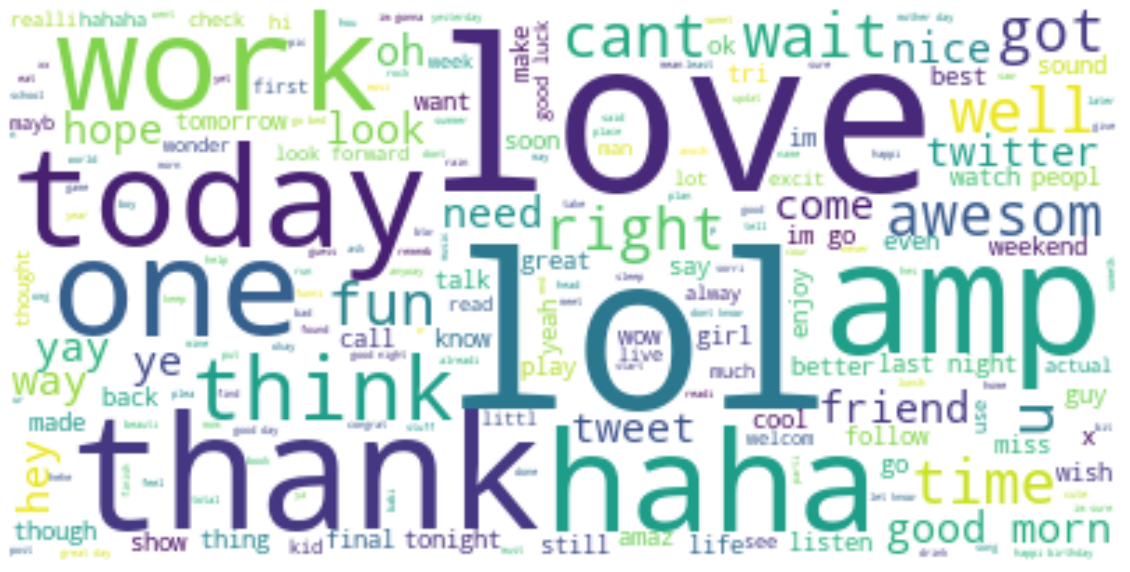

In [9]:
text_p = " ".join(data[data.Polarity == 4].Tweet)
wordcloud_p = WordCloud(stopwords=stopwords, background_color="white").generate(text_p)

plt.figure( figsize=(20, 20))
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis("off")
plt.show()

## Negative Sentiments

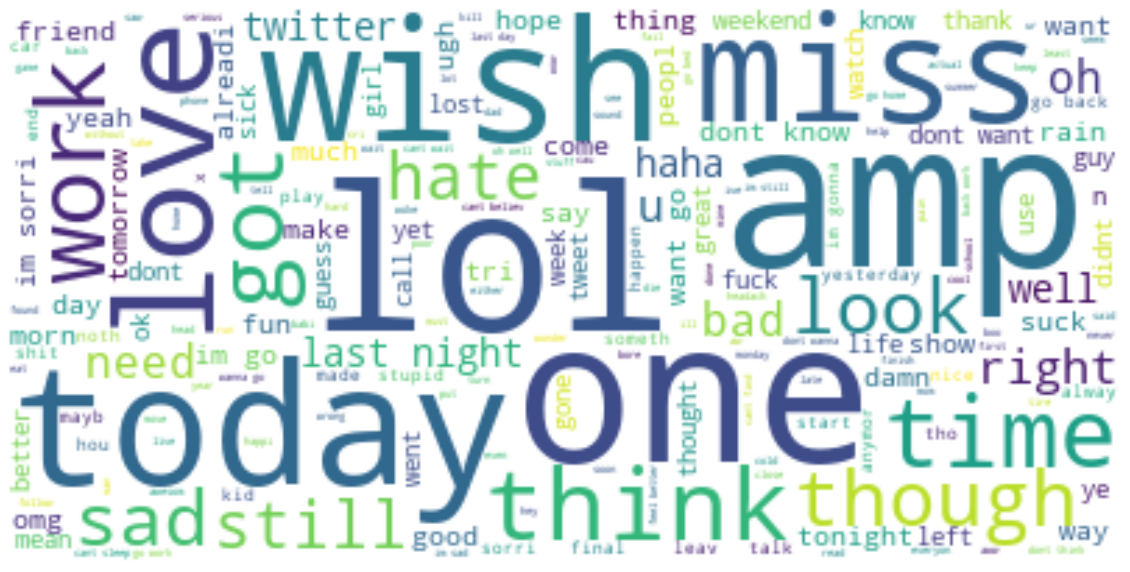

In [10]:
text_n = " ".join(data[data.Polarity == 0].Tweet)
wordcloud_n = WordCloud(stopwords=stopwords, background_color="white").generate(text_n)

plt.figure( figsize=(20, 20))
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.axis("off")
plt.show()